

Epoch 1/100

162/162 [==============================] - 2s 3ms/step - loss: 0.0543
Epoch 2/100
162/162 [==============================] - 1s 3ms/step - loss: 0.0488
Epoch 3/100
162/162 [==============================] - 1s 4ms/step - loss: 0.0488
Epoch 4/100
162/162 [==============================] - 1s 3ms/step - loss: 0.0487
Epoch 5/100
162/162 [==============================] - 1s 4ms/step - loss: 0.0479
Epoch 6/100
162/162 [==============================] - 1s 4ms/step - loss: 0.0475
Epoch 7/100
162/162 [==============================] - 1s 3ms/step - loss: 0.0473
Epoch 8/100
162/162 [==============================] - 1s 3ms/step - loss: 0.0471
Epoch 9/100
162/162 [==============================] - 1s 3ms/step - loss: 0.0454
Epoch 10/100
162/162 [==============================] - 1s 3ms/step - loss: 0.0460
Epoch 11/100
162/162 [==============================] - 1s 3ms/step - loss: 0.0461
Epoch 12/100
162/162 [==============================] - 1s 3ms/step - loss: 0.0457
Epoch 13/1

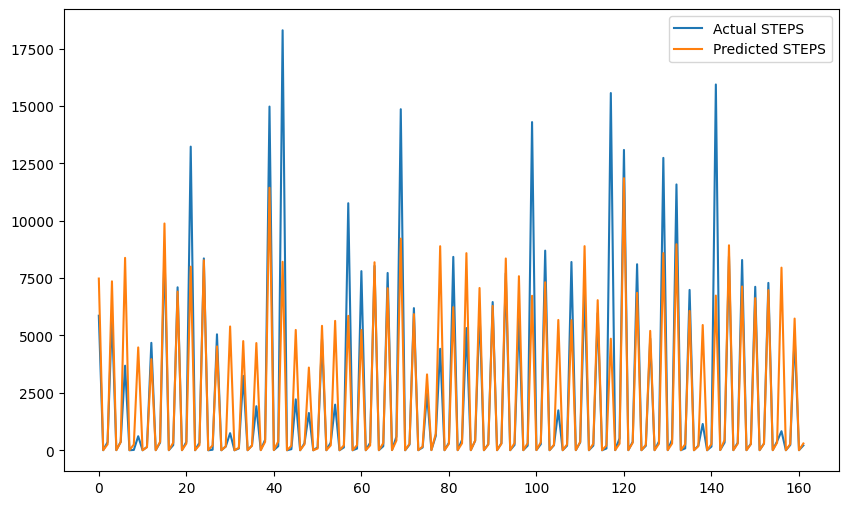

In [2]:
#LSTM
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('output_data.csv')

# Select features for modeling (STEPS, KM, CAL BURNT)
selected_features = ['STEPS', 'KILOMETERS', 'CALORIES BURNT']
dataset = data[selected_features].values

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Function to create sequences suitable for an LSTM
def create_sequences(data, time_steps=1):
    dataX, dataY = [], []
    for i in range(len(data) - time_steps):
        a = data[i:(i + time_steps), :]
        dataX.append(a)
        dataY.append(data[i + time_steps, 0])  # Assuming predicting 'STEPS'
    return np.array(dataX), np.array(dataY)

# Define the number of time steps
time_steps = 10  # You can adjust this

# Create sequences for LSTM
trainX, trainY = create_sequences(scaled_data, time_steps)

# Reshape the input data for LSTM [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], trainX.shape[2]))

# Create the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(units=1))  # Adjust units for output dimension if needed
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model.fit(trainX, trainY, epochs=100, batch_size=1)

# Make predictions
trainPredict = model.predict(trainX)

# Inverse transform the predictions to their original scale separately for each column
trainPredict = scaler.inverse_transform(trainPredict.reshape(-1, len(selected_features)))
trainY = scaler.inverse_transform(trainY.reshape(-1, len(selected_features)))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(trainY.flatten(), trainPredict.flatten()))
print(f"RMSE: {rmse}")

# Plotting
plt.figure(figsize=(10, 6))

# Plot original data and predictions
plt.plot(trainY.flatten(), label='Actual STEPS')
plt.plot(trainPredict.flatten(), label='Predicted STEPS')

plt.legend()
plt.show()


C:\Users\91833\AppData\Local\Temp\ipykernel_15224\3626961579.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result = [series[0]]  # Initialize the result with the first value
C:\Users\91833\AppData\Local\Temp\ipykernel_15224\3626961579.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result.append(alpha * series[i] + (1 - alpha) * result[i-1])


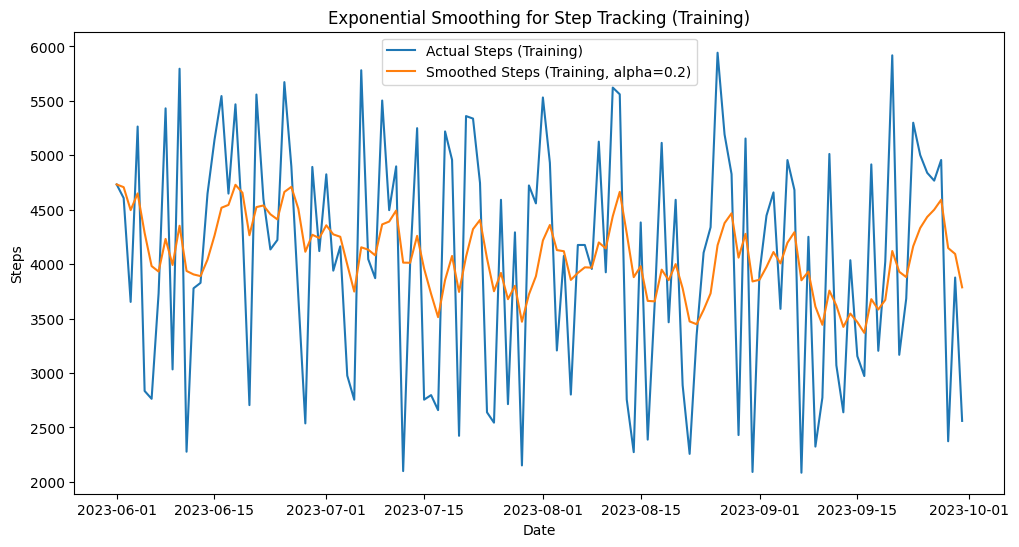

C:\Users\91833\AppData\Local\Temp\ipykernel_15224\3626961579.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result = [series[0]]  # Initialize the result with the first value
C:\Users\91833\AppData\Local\Temp\ipykernel_15224\3626961579.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result.append(alpha * series[i] + (1 - alpha) * result[i-1])


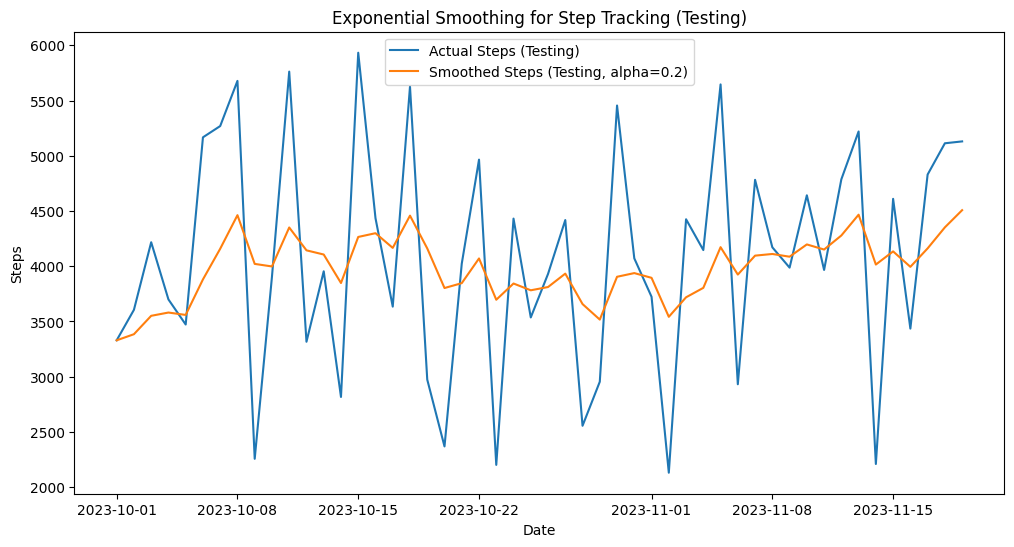

Root Mean Squared Error on the testing set: 893.5311113967432


c:\Users\91833\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\91833\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\91833\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\91833\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

In [5]:
#Exponential smoothing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Generate synthetic data for testing
np.random.seed(0)
date_rng = pd.date_range(start='2023-06-01', end='2023-11-19', freq='D')
steps = np.random.randint(2000, 6000, size=(len(date_rng)))
df = pd.DataFrame(data={'Steps': steps}, index=date_rng)

# Define the split point between training and testing sets
split_date = '2023-10-01'
train = df.loc[df.index < split_date].copy()
test = df.loc[df.index >= split_date].copy()

# Exponential smoothing function
def exponential_smoothing(series, alpha):
    result = [series[0]]  # Initialize the result with the first value
    for i in range(1, len(series)):
        result.append(alpha * series[i] + (1 - alpha) * result[i-1])
    return result

# Define alpha (smoothing parameter)
alpha = 0.2

# Apply exponential smoothing to the training set
train['Smoothed_Steps'] = exponential_smoothing(train['Steps'], alpha)

# Plot the results for the training set
plt.figure(figsize=(12, 6))
plt.plot(train['Steps'], label='Actual Steps (Training)')
plt.plot(train['Smoothed_Steps'], label=f'Smoothed Steps (Training, alpha={alpha})')
plt.title('Exponential Smoothing for Step Tracking (Training)')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.legend()
plt.show()

# # Apply exponential smoothing to the testing set
test['Smoothed_Steps'] = exponential_smoothing(test['Steps'], alpha)

# Plot the results for the testing set
plt.figure(figsize=(12, 6))
plt.plot(test['Steps'], label='Actual Steps (Testing)')
plt.plot(test['Smoothed_Steps'], label=f'Smoothed Steps (Testing, alpha={alpha})')
plt.title('Exponential Smoothing for Step Tracking (Testing)')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.legend()
plt.show()

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(test['Steps'], test['Smoothed_Steps'])

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)


print(f'Root Mean Squared Error on the testing set: {rmse}')


c:\Users\91833\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\91833\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Root Mean Squared Error (RMSE): 3.351140407041649


c:\Users\91833\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\91833\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\91833\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\91833\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

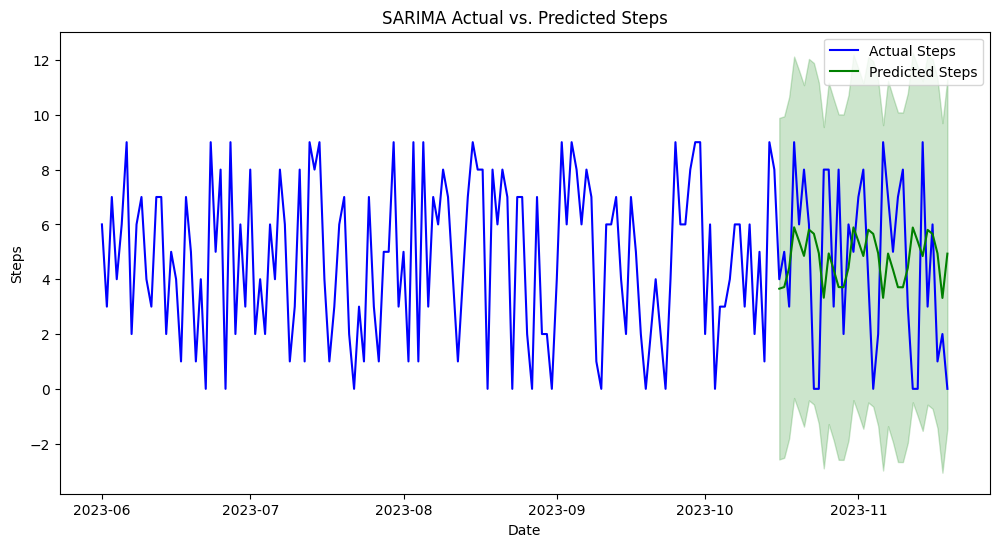

In [34]:
#SARIMA
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

# Generate sample data (replace this with your actual data)
dates = pd.date_range(start='2023-06-01', end='2023-11-19', freq='D')
np.random.seed(42)
actual_steps = np.random.randint(0, 10, size=len(dates))

# Create a DataFrame with the generated data
data = pd.DataFrame({'Date': dates, 'Actual_Steps': actual_steps})
data.set_index('Date', inplace=True)

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# SARIMA function
def sarima(train, test, order, seasonal_order):
    model = SARIMAX(train, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
    model_fit = model.fit(disp=False)
    forecast = model_fit.get_forecast(steps=len(test))
    return forecast

# Hyperparameter tuning (you can adjust order and seasonal_order based on your data)
order = (1, 1, 1)  # Replace with the appropriate order
seasonal_order = (1, 1, 1, 12)  # Replace with the appropriate seasonal_order

# Train the model
forecast = sarima(train, test, order, seasonal_order)

# Calculate RMSE
rmse = sqrt(mean_squared_error(test['Actual_Steps'], forecast.predicted_mean))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plotting function for actual and predicted steps
def plot_actual_vs_predicted(actual, forecast):
    plt.figure(figsize=(12, 6))
    
    # Plot actual steps
    plt.plot(actual.index, actual['Actual_Steps'], label='Actual Steps', color='blue')
    
    # Plot predicted steps
    predicted_mean = forecast.predicted_mean
    plt.plot(predicted_mean.index, predicted_mean, label='Predicted Steps', color='green')
    
    # Plot confidence interval
    conf_int = forecast.conf_int()
    plt.fill_between(predicted_mean.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='green', alpha=0.2)
    
    plt.title('SARIMA Actual vs. Predicted Steps')
    plt.xlabel('Date')
    plt.ylabel('Steps')
    plt.legend()
    plt.show()

# Plot the results
plot_actual_vs_predicted(data, forecast)
